In [ ]:
#FIBONACCI-BASED MATRIX INDEXING : NATURAL FRACTURE INTENSITIES USING FIBONACCI'S GROWTH
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fibonacci_zero_matrix = np.zeros((10,10))

#generate the first 10 fibonacci numbers
#first create the fibonacci function
def generate_finbonacci(x):
    fibonacci_numbers = [0,1]
    for n in range(2,x):
        next_fibonacci_value = fibonacci_numbers[-1] + fibonacci_numbers[-2]
        fibonacci_numbers.append(next_fibonacci_value)
    return fibonacci_numbers

        
#now we can generate the fibonacci number for 10
fibonacci_numbers = generate_finbonacci(10)
print("The fibonacci numbers are:",fibonacci_numbers)

#place the fibonacci numbers on the diagonal of the matrix
np.fill_diagonal(fibonacci_zero_matrix,fibonacci_numbers)

#multiplying even index rows by 2, index rows [::2]
fibonacci_zero_matrix[::2] * 2  

#flip vertically
flipped_matrix = np.flipud(fibonacci_zero_matrix)

print("Modified Matrix:\n", flipped_matrix)



The fibonacci numbers are: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
Modified Matrix:
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 34.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 21.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 13.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  8.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  5.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  3.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [19]:
import tejirinp as tjnp

fib = tjnp.generate_fibonacci(15)
print(fib)


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368, 75025, 121393, 196418, 317811, 514229, 832040, 1346269, 2178309, 3524578, 5702887, 9227465, 14930352, 24157817, 39088169, 63245986, 102334155, 165580141, 267914296, 433494437, 701408733, 1134903170, 1836311903, 2971215073, 4807526976, 7778742049, 12586269025, 20365011074, 32951280099, 53316291173, 86267571272, 139583862445, 225851433717, 365435296162, 591286729879, 956722026041, 1548008755920, 2504730781961, 4052739537881, 6557470319842, 10610209857723, 17167680177565, 27777890035288, 44945570212853, 72723460248141, 117669030460994, 190392490709135, 308061521170129, 498454011879264, 806515533049393, 1304969544928657, 2111485077978050, 3416454622906707, 5527939700884757, 8944394323791464, 14472334024676221, 23416728348467685, 37889062373143906, 61305790721611591, 99194853094755497, 160500643816367088, 259695496911122585, 420196140727489673, 679891637638612258, 110008777

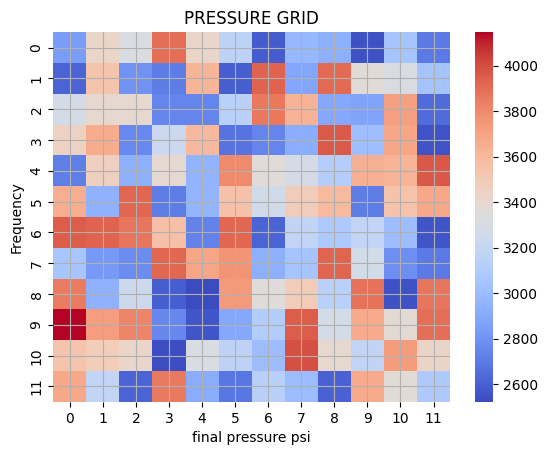

The number of grid cells with risks of fracturing are 0
The highest pressure is 4147.89 psi and location in the grid is (np.int64(9), np.int64(0))


In [ ]:
#WATER INJECTION EFFICIENCY ACROSS A RESERVOIR
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pressure_1 = 2500
pressure_2 = 4000

#initial pressure grid
water_injection_grid = np.random.uniform(pressure_1,pressure_2,(12,12))

#generating fibonacci numbers

from tejirinp import generate_fibonacci
fibonacci_numbers=generate_fibonacci(144)
print(fibonacci_numbers)

#normalizing the water_injection_grid
fibonacci_array = np.array(fibonacci_numbers)
normalized_fibonacci= (fibonacci_array - np.min(fibonacci_array)) / (np.max(fibonacci_array) - np.min(fibonacci_array))

#using spiral index generator to apply fibonacci values in the grid
from tejirinp import spiral_indices_from_center

"""
import importlib
import tejirinp

importlib.reload(tejirinp)
"""
#applying the spiral indices

from tejirinp import spiral_indices_from_center
spiral_order = np.array(spiral_indices_from_center(12,12))
print(spiral_order)

#boosted grid
boost_grid = np.zeros((12,12))

#filling the boosted grid using the spiral indices and boosted grid
for i,(row,column) in enumerate(spiral_order):
    boost_grid[row,column] = normalized_fibonacci[i] * 500
    
final_pressure = water_injection_grid + boost_grid
print(final_pressure)

#VISUALISATION
sns.heatmap(final_pressure,cmap="coolwarm",annot=False)
plt.title("PRESSURE GRID")
plt.xlabel("final pressure psi")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#how many grid went above 4500 psi
risk_of_fracturing = np.sum(final_pressure > 4500)
print(f"The number of grid cells with risks of fracturing are {risk_of_fracturing}")

#identifying and locating the highest pressure point
maximum_pressure = np.max(final_pressure)

#index of the maximum pressure
maximum_pressure_index =np.argmax(final_pressure)

#finding the location of the final maximum pressure
maximum_pressure_location =np.unravel_index(maximum_pressure_index,final_pressure.shape)
print(f"The highest pressure is {maximum_pressure:.2f} psi and location in the grid is {maximum_pressure_location}")










The pressure drop across the grid is:
 [0.29317424 0.28719109 0.28120794 0.2752248  0.26924165 0.2632585
 0.25727535 0.25129221 0.24530906 0.23932591 0.23334276 0.22735961
 0.22137647 0.21539332 0.20941017 0.20342702 0.19744388 0.19146073
 0.18547758 0.17949443 0.17351128 0.16752814 0.16154499 0.15556184
 0.14957869 0.14359555 0.1376124  0.13162925 0.1256461  0.11966295
 0.11367981 0.10769666 0.10171351 0.09573036 0.08974722 0.08376407
 0.07778092 0.07179777 0.06581463 0.05983148 0.05384833 0.04786518
 0.04188203 0.03589889 0.02991574 0.02393259 0.01794944 0.0119663
 0.00598315 0.        ] psi
The final pressure drop at each radius are:
 [3999.70682576 3999.71280891 3999.71879206 3999.7247752  3999.73075835
 3999.7367415  3999.74272465 3999.74870779 3999.75469094 3999.76067409
 3999.76665724 3999.77264039 3999.77862353 3999.78460668 3999.79058983
 3999.79657298 3999.80255612 3999.80853927 3999.81452242 3999.82050557
 3999.82648872 3999.83247186 3999.83845501 3999.84443816 3999.85042131

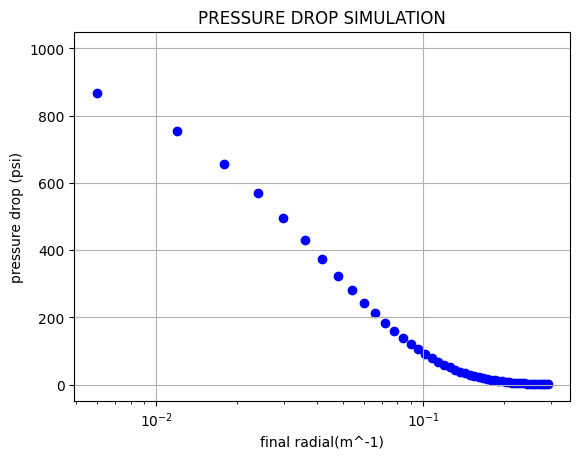

Pressure at the wellbore when (r =1ft) is 3999.707 psi


In [5]:
#SIMULATING PRESSURE DROP DUE TO PRODUCTION IN A PETROLEUM RESERVOIR
import numpy as np

#parameters
q = 500
u = 2
B = 1.2
k =150
h = 30
re = 1000
pressure_initial = 4000

#BUILDING A RADIAL GRID
pressure_radial_grid = np.geomspace(1,1000,50)


#computing the pressure drop across the grid
pressure_drop = (q*u*B)/(2*np.pi*k*h) * np.log(re/pressure_radial_grid)
print("The pressure drop across the grid is:\n",pressure_drop,'psi')

#computing the final pressure at each radius
final_pressure = pressure_initial - pressure_drop
print("The final pressure drop at each radius are:\n", final_pressure,'psi')

#VISUALIZATION
import matplotlib.pyplot as plt
x = pressure_drop
y = pressure_radial_grid
plt.scatter(x,y,color="blue")
plt.title("PRESSURE DROP SIMULATION")
plt.xlabel("final radial(m^-1)")
plt.ylabel("pressure drop (psi)")
plt.xscale('log')
plt.grid()
plt.show()


#finding the pressure at the wellbore when r = 1ft

# find the index where radius is closest to 1 
index_at_wellbore = np.argmin(np.abs(pressure_radial_grid -1))


#find the final pressure at r = 1
pressure_at_wellbore = final_pressure[index_at_wellbore]
print(f"Pressure at the wellbore when (r =1ft) is {pressure_at_wellbore:.3f} psi")








In [38]:
radii = np.geomspace(1, 500, 30)
pressures = 4000 - (np.log(radii) * 50)

#finding the pressure when radius is closest to 5ft

index = np.argmin(np.abs(pressures - 5))
pressure = pressures[index]
print(f"The pressure when (r is closest to 5ft) is {pressure:.3f} psi")

The pressure when (r is closest to 5ft) is 3689.270 psi


New permeability grid:
 [[1 2 2 2 2 2 2 2 2 1]
 [1 1 0 0 1 2 2 2 1 1]
 [1 2 1 2 1 2 1 2 0 2]
 [0 1 2 2 2 2 2 1 1 2]
 [0 2 2 2 1 2 2 2 1 1]
 [2 2 1 2 1 0 2 2 2 1]
 [2 0 1 2 0 2 2 2 2 1]
 [0 2 2 2 2 1 2 1 2 2]
 [2 1 2 2 1 2 2 1 2 1]
 [2 2 2 1 1 1 2 1 1 1]]
The number of times low permeability appeared in the grid is 9 times 
The number of times medium permeability appeared in the grid is 34 times
The number of times high permeability appeared in the grid is 57 times


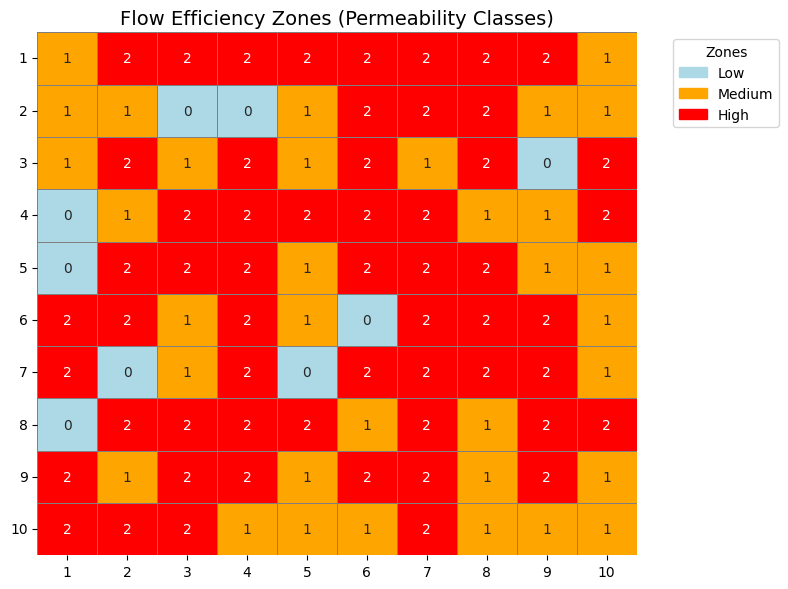

In [ ]:
#GOAL: PERMEABILITY MAPPING WITH FLOW EFFICIENCIES ZONES TO DETERMINE THE DIFFERENT PERMEABILITY GRID ZONES IN A RESERVOIR
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#characterization of random pressure values between (10 and 1000 psi) in a 10 by 10 grid
permeability_grid = np.random.uniform(10,1000,(10,10))

#converting the grid to base-10 log because permeability values are typically log distributed
permeability_log_grid = np.log10(permeability_grid)

#classify the zones
classified_log_grid = np.empty_like(permeability_log_grid, dtype=object) #this would allow string assignment, the empty there would create an empty array to insert those new values that are to be assigned 
classified_log_grid[permeability_log_grid < 2] ="Low permeability"
classified_log_grid[(permeability_log_grid <=2) & (permeability_log_grid <= 2.7)] ="Medium permeability"
classified_log_grid[permeability_log_grid > 2.7] ="High permeability"
# print("Classified_log_grid\n",classified_log_grid)

#create a new grid to classify the ranges of the different permeability zones
new_permeability_grid = np.zeros_like(permeability_log_grid, dtype=int)
new_permeability_grid[(permeability_log_grid >=2) & (permeability_log_grid <2.7)] = 1
new_permeability_grid[permeability_log_grid >=2.7] = 2
print("New permeability grid:\n",new_permeability_grid)

#counting how many grids fall into each zone
Low_permeability = np.sum(new_permeability_grid ==0)
print(f"The number of times low permeability appeared in the grid is {Low_permeability} times ")

medium_permeability = np.sum(new_permeability_grid ==1)
print(f"The number of times medium permeability appeared in the grid is {medium_permeability} times")

high_permeability = np.sum(new_permeability_grid ==2)
print(f"The number of times high permeability appeared in the grid is {high_permeability} times")

#VISUALISATION
# Set up a color map for the integer-based zone map
zone_labels = ["Low", "Medium", "High"]
cmap = sns.color_palette(["lightblue", "orange", "red"])

plt.figure(figsize=(8, 6))
sns.heatmap(new_permeability_grid, annot=True, fmt="d", cmap=cmap, cbar=False, linewidths=0.5, linecolor="gray")

# Add tick labels
plt.xticks(ticks=np.arange(10) + 0.5, labels=np.arange(1, 11))
plt.yticks(ticks=np.arange(10) + 0.5, labels=np.arange(1, 11), rotation=0)

# Title and legend
plt.title("Flow Efficiency Zones (Permeability Classes)", fontsize=14)
handles = [plt.Rectangle((0, 0), 1, 1, color=c) for c in cmap]
plt.legend(handles, zone_labels, title="Zones", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()





Permeability_grid (md):
 [[780.97457945 573.75529104 746.97011553 ... 697.08518165 703.66973137
  750.08995369]
 [832.36614408 902.06987421 418.25676542 ... 892.55424502 168.70015804
  157.75127888]
 [765.49363015 964.12709566 892.02678927 ... 989.80938816 169.88778722
  413.68541524]
 ...
 [210.67009794 135.9780118  823.7520449  ... 863.63459299 278.00668294
  547.70109397]
 [335.10569641 868.21249285 267.12418666 ... 354.74086537 690.1310623
  694.88219956]
 [289.59512293 638.28616162 328.07057324 ... 697.34333413 849.0328069
  720.07598882]]
saturation_grid(1 for swept zone, 0 for non-swept zone(low-permeability zone)):
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
The sweep efficiency in the reservoir is 89.12%
----------VISUALIZATION----------


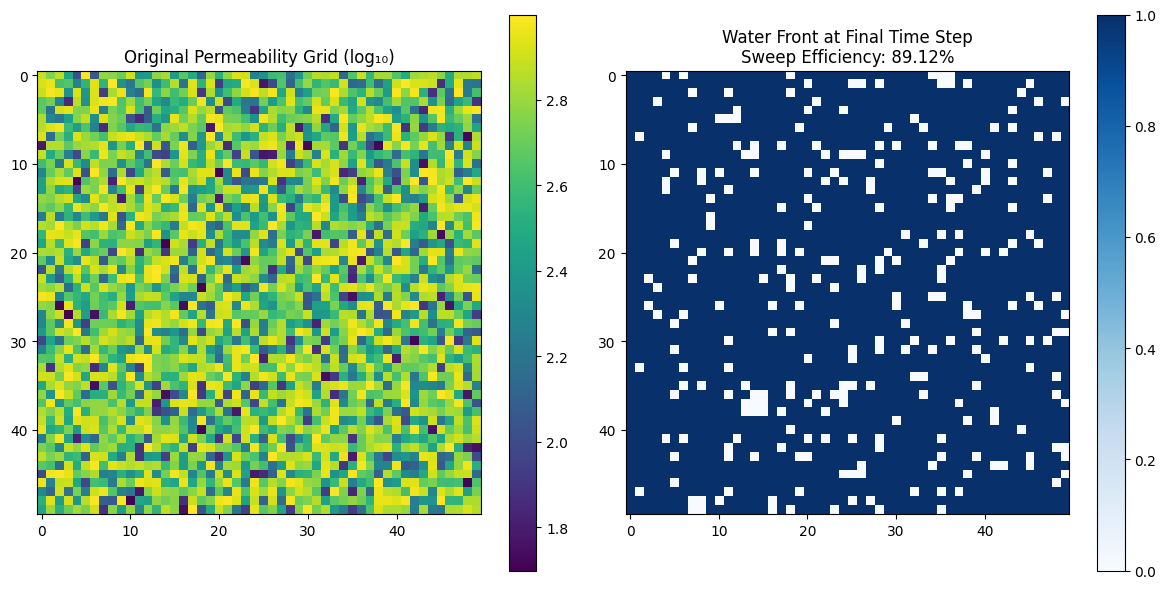

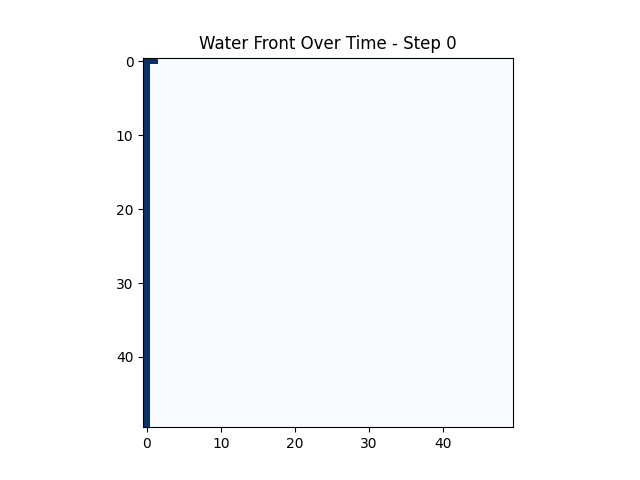

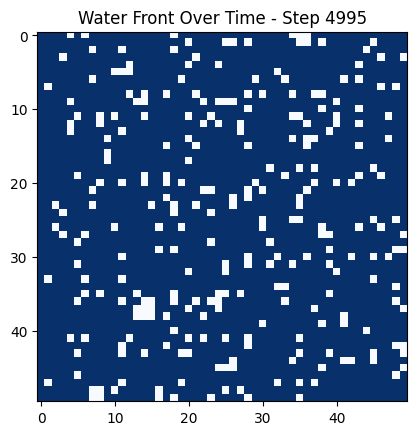

In [ ]:
"""
WATERFLOOD SWEEP EFFICIENCY IN A HETEROGENOUS RESERVOIR
simulating how injected water moves through a reservoir and analyze how rock permeability controls that sweep
GOAL: TO DETERMINE HOW FAR WATER PENETRATES OVER TIME AND WHERE OIL MIGHT BE BYPASSED DUE TO POOR ROCK QUALITY(LOW PERMEABILITY)
"""
import numpy as np
permeability_grid = np.random.uniform(50,1000,(50,50))
permeability_log_grid = np.log10(permeability_grid)
print("Permeability_grid (md):\n",permeability_grid)

#SIMULATING WATER MOVEMENTS (rightward,upward,downward)
#first, I initialize non-saturation across the grid to assume no grid is been swept yet
saturation_grid = np.zeros((50,50))

#Water flooding begins from the left column of the grid and makes them saturated to allow the 20 time steps further more
saturation_grid[:,0] =1 

# 1 for saturated(water swept)
# 0 for non-saturated (no water swept)

# Store snapshots for animation
frames = []

#SIMULATING WATER FLOW FOR 20 TIME STEPS
for x in range(20):
    new_saturation = saturation_grid.copy()
    for i in range(50):
        for j in range(50):
            if saturation_grid[i, j] == 1:
                for ni, nj in [(i-1, j), (i+1, j), (i, j+1)]:  # up, down, right
                    if 0 <= ni < 50 and 0 <= nj < 50:
                        if permeability_grid[ni, nj] > 250: #if it meets the flow condition of > 150md,sweep it 
                            new_saturation[ni, nj] = 1    
        saturation_grid = new_saturation
        frames.append(saturation_grid.copy())  # Store frame

#TRACKING THE WATER FRONT (0 for non-swept zone, 1 for swept zone)
print("saturation_grid(1 for swept zone, 0 for non-swept zone(low-permeability zone)):\n",saturation_grid)

#COMPUTING THE SWEEP efficiency
swept_cells = np.sum(saturation_grid ==1)
total_cells = saturation_grid.size

sweep_efficiency = (swept_cells)/(total_cells) *100
print(f"The sweep efficiency in the reservoir is {sweep_efficiency:.2f}%")

#VISUALIZATION

print("----------VISUALIZATION----------")
import matplotlib.pyplot as plt
import matplotlib.animation as animation
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Log-scaled permeability
im1 = axs[0].imshow(permeability_log_grid, cmap='viridis')
axs[0].set_title('Original Permeability Grid (log₁₀)')
fig.colorbar(im1, ax=axs[0])

# Plot 2: Final water saturation (water front)
im2 = axs[1].imshow(saturation_grid, cmap='Blues')
axs[1].set_title(f'Water Front at Final Time Step\nSweep Efficiency: {sweep_efficiency:.2f}%')
fig.colorbar(im2, ax=axs[1])

plt.tight_layout()
plt.show()

#ANIMATION

fig, ax = plt.subplots()
im = ax.imshow(frames[0], cmap='Blues', vmin=0, vmax=1)
title = ax.set_title("Water Front Over Time - Step 0")

def update(i):
    im.set_array(frames[i])
    title.set_text(f"Water Front Over Time - Step {i*5}")
    return [im, title]

ani = animation.FuncAnimation(fig, update, frames=len(frames), interval=300, blit=True)

# Save as GIF
ani.save("saturation_front.gif", writer='pillow', fps=250)

from IPython.display import Image
Image(filename="saturation_front.gif")
































In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
